# STAT207 Final Project - Analysis on human body dimensions given different parameters

Sunghwan Yoon (sy54), Jonathan Wang (youchun2), and WEI-CHENG WU (wcw7)

## 1. Introduction

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, binom

b. Motivation:

We want to explore this dataset because it looks interesting when we first encounter it. Not only did the dataset include comprehensive body measurement with values one can rarely get, but we also immediately came up with different questions that we would like to understand through this dataset. The amount of variables in this dataset allow us to build a more complex model when it comes to finding the relationship between height, sex, age, and other body measurements. Also, we want to understand the difference between men and women body numerically through this opportunity.

c. Briefly describe why you would be interested in answering these research questions.

For the linear regression model, the reason I'm interested in the research question is because I would like to know what are some key factors that affect one's height. If we are able to answer such question, we might be able to find the best way to increase one's height and help children with height below average to grow taller and faster.

For the descriptive analytics research question, we aim to investigate if there is a correlation between waist girth and weight, as it is commonly believed that weight has a significant impact on waist girth.

For the inference research question, we postulate that there may not be a significant difference in the mean waist girths between males and females. Therefore, we have formulated hypotheses and conducted research to investigate this hypothesis.

For the logistic regression, I wanted to test if the variables  chest_diameter, height, and weight can predict the sex.

d. Display at least 6 observations from your dataframe in this section and
show how many rows and columns it has.

In [2]:
df = pd.read_csv("bdims.csv")
df.head(10)

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,Male,under_30
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,Male,under_30
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,Male,under_30
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,Male,under_30
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30
5,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,Male,under_30
6,43.5,30.0,34.0,21.9,31.7,16.1,12.5,20.8,15.6,123.5,...,32.3,40.1,40.3,23.6,18.8,26,86.4,184.0,Male,under_30
7,44.4,29.8,33.2,21.8,28.8,15.1,11.9,21.0,14.6,120.4,...,28.0,39.2,36.7,22.5,18.0,27,78.4,184.5,Male,under_30
8,43.5,26.5,32.1,15.5,27.5,14.1,11.2,18.9,13.2,111.0,...,26.0,35.5,35.0,22.0,16.5,23,62.0,175.0,Male,under_30
9,42.0,28.0,34.0,22.5,28.0,15.6,12.0,21.1,15.0,119.5,...,29.2,38.3,38.6,22.2,16.9,21,81.6,184.0,Male,under_30


In [3]:
df.shape

(487, 26)

e. Think Critically: 

Although the values recorded in the data set are complete and comprehensive, it still lacks some important information. For example, we cannot seperate the obseravtions by race even if there's many indication that this variable may have a huge influence on the average of every body parameters. Some of the other limitations is the lack of data for people of younger age. Although this is a data set for adults, but if we want to anyalyze or make a model for some parameter, having observations from all age range will give us a better understanding to the population as a whole.  

## 2. Descriptive Analytics

### a. Goal
Is there any relationship between *weight* and *waist gitrh*, separated by *sex* to be observed more precisely?

### b. State your research question you will answer with your analysis.
Is the relationship between weight and waist girth more noticeable when separated by sex?

### c. Use at least one visualization to answer this question.

In [4]:
class Dict(dict):
    def __init__(self, vars):
        super().__init__()
        self = self.update({i: i for i in list(vars)})
    def __getattr__(self, __name: str) -> str:
        try:
            return self[__name]
        except:
            raise AttributeError
    def __setattr__(self, __name: str, __value: str) -> None:
        self[__name] = __value
        return super().__setattr__(__name, __value)

vars = Dict(df.columns)

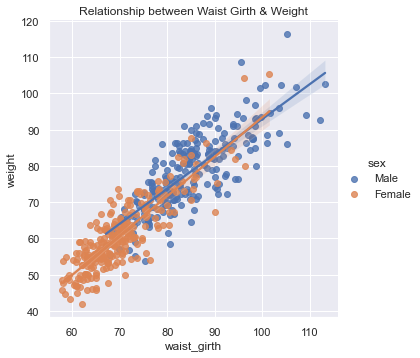

In [5]:
# waist_girth, weight, sex
sns.lmplot(x=vars.waist_girth, y=vars.weight, hue=vars.sex, data=df)
plt.title('Relationship between Waist Girth & Weight')
plt.show()

### d. Use at least one set of summary statistics to help answer this question as well.

In [6]:
df[[vars.sex, vars.waist_girth, vars.weight]].groupby(vars.sex).corr()

waist_girth    weight
sex                                      
Female waist_girth     1.000000  0.857715
       weight          0.857715  1.000000
Male   waist_girth     1.000000  0.801070
       weight          0.801070  1.000000

### e. Describe what you see in your visualization and summary statistics, what they tell you, and how they help answer your research question.

In the scatter plots, we can see that waist girth and weight are basically correlated regardless of sex. However, we can observe that for females, both weight and waist girth are lower and their correlation is stronger.

Therefore, we believe that the relationship between weight and waist girth is not significantly impacted by sex because they already have a strong correlation.

## 3. Inference

### a. Goal
#### i.
Is there a difference in the mean of waist girth between males and females in my population?
#### ii. Choose one of the following types of inference parameters
The difference of two population means.

### b. State your research question that you will answer with your analysis
Is the mean of waist girth different between males and females in my population?

### c. Complete at least one hypothesis test to answer this research question, including

#### i. Stating your hypotheses
$H_0:\mu_\text{male}-\mu_\text{female}=0$ <br>
$H_1:\mu_\text{male}-\mu_\text{female}\not=0$

#### ii. Checking the conditions for this test

In [7]:
df_sample = df.sample(10000, replace=True)
df_sample

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30
310,39.9,20.0,32.4,17.6,31.9,13.6,10.4,18.5,13.4,117.0,...,26.6,35.2,36.7,21.8,16.2,23,71.6,164.1,Female,under_30
93,41.1,31.7,34.2,22.8,34.0,13.8,11.8,19.4,15.4,122.6,...,30.3,39.5,39.4,25.6,18.3,38,88.6,174.0,Male,30-39
102,42.1,28.5,31.7,19.4,28.0,14.0,11.3,19.0,14.4,115.0,...,27.6,34.7,34.6,20.6,16.0,26,71.8,177.8,Male,under_30
404,37.6,31.3,33.5,17.0,25.4,12.4,9.4,19.2,11.5,105.0,...,26.2,39.6,39.1,24.8,16.2,44,72.7,175.3,Female,40 and above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,36.9,25.9,31.7,19.9,27.3,14.8,10.6,19.4,14.3,115.5,...,25.8,35.6,35.1,21.8,16.3,32,70.0,171.4,Male,30-39
393,35.8,30.2,33.5,20.6,27.5,12.4,9.4,18.4,13.0,99.7,...,23.3,33.9,33.3,21.2,14.9,64,58.6,156.2,Female,40 and above
131,38.7,26.1,29.2,18.2,24.9,13.6,10.4,17.6,14.2,104.3,...,24.8,32.6,33.1,22.1,16.3,29,63.6,177.8,Male,under_30
339,35.7,28.3,29.6,17.4,23.3,10.7,8.7,16.8,11.3,99.2,...,23.2,34.6,34.2,20.3,14.2,25,51.8,163.5,Female,under_30


In [8]:
df_male = df_sample[df_sample[vars.sex] == 'Male'][vars.waist_girth]
df_female = df_sample[df_sample[vars.sex] == 'Female'][vars.waist_girth]
df_male.shape, df_female.shape

((4694,), (5306,))

- Random sample $\checkmark$

- Both of these are reasonable. $\checkmark$ <br>
$n_\text{male}< 10\%\ N_\text{male}$ <br>$n_\text{female}< 10\%\ N_\text{female}$ <br>

- Two samples are independent. $\checkmark$ 
- Distribution assumption $\checkmark$ <br>
$n_\text{male}\geq30$ <br>$n_\text{female}\geq30$ <br>

#### iii. Calculating a p-value (or confidence interval) for this test by hand

In [9]:
mu1, mu2 = df_male.mean(), df_female.mean()
s1, s2 = df_male.std(), df_female.std()
n1, n2 = len(df_male), len(df_female)
mu1, mu2, s1, s2, n1, n2

(85.01239880698765,
 69.79293252921221,
 8.78908504061413,
 7.473105848417279,
 4694,
 5306)

In [10]:
test_stats = ((mu1 - mu2) - 0) / np.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))
test_stats

92.6534921226188

In [11]:
pval = 2 * (1 - t.cdf(test_stats, df=min(n1, n2)))
pval

0.0

#### iv. Using your results to state a conclusion.
At any reasonable $\alpha$, p-value = 0.0 < $\alpha$, so we reject $\mu_\text{male}=\mu_\text{female}$.
In conclusion, there is sufficient evidence to suggest that the population mean waist girth for males is different from the population mean waist girth for females.

### d. Finally, discuss how your conclusion answers your research question.

We found that the mean waist girth differs between males and females. As shown in the scatter plot, data points for females tended to be clustered towards the lower end of both weight and waist girth scales, whereas points for males were clustered in the center.

## 4. Linear Regression

a. Goal: What contributes to the height of a person, does it depends on sex, age group, shoulder girth, and knee diameter?

b. Research Question: Is there a predictable linear relationship pattern that support the idea that the height of a person is determined by their sex, age group, shoulder girth, as well as knee diameter?

c. i.

In [12]:
model4 = smf.ols('height ~ sex + age_group + shoulder_girth + knee_diameter', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 01 May 2023   Prob (F-statistic):           2.33e-81
Time:                        16:44:04   Log-Likelihood:                -1589.3
No. Observations:                 487   AIC:                             3191.
Df Residuals:                     481   BIC:                             3216.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   115.9915      5.366     21.616      0.000     105.448     126.535
sex[T.Male]                   7.8740      0.935      8.419      0.000       6.036       9.712
age_group[T.40 and above]    -1.4801      0.890     -1.663      0.097      -3.229       0.269
age_group[T.under_30]         0.8346      0.702      1.189      0.235      -0.545       2.214
shoulder_girth                0.1711      0.052      3.310      0.001       0.070       0.273
knee_diameter                 1.7359      0.295      5.876      0.000       1.155       2.316
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                1.358
Skew:                           0.069   Prob(JB):                        0.507
Kurtosis:                       2.782   Cond. No.                     2.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c. ii.

$\hat{y} = 115.9915 + 7.8740 * sex[T.Male] -1.4801	* age_group[T.40 and above] + 0.8346 * age_group[T.under_30] + 0.1711 * shoulder_girth + 1.7359 * knee_diameter$

where $\hat{y}$ is the predicted average height in centimeters for a person.

c. iii. Check the linear regression conditions:

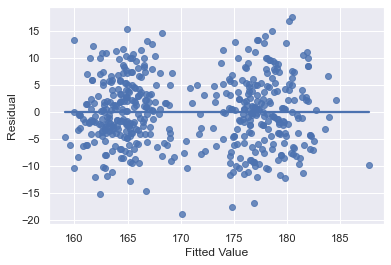

In [13]:
sns.regplot(x=model4.fittedvalues, y=model4.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 1: Linearity Condition

Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

Condition 2: Constant Variability of Residuals Condition

Because the y‑axis spread of points in the plot below slightly change as we move from left to right, with the middle part having a slightly smaller spread, we can say that this condition is slightly not met.

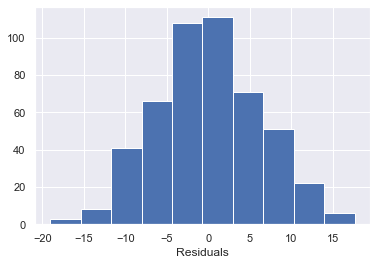

In [14]:
plt.hist(model4.resid)
plt.xlabel('Residuals')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is unimoal and symmetric and with a mean of 0, the assumption that the residuals are normally distributed is met.

Condition 4 Independence of Residuals Condition

At the very least, we verify that:
- the data is randomly sampled and
- the sample size n=487<10% of all healthy adults

Thus the condition for independence of residuals may not be violated in this particular way.

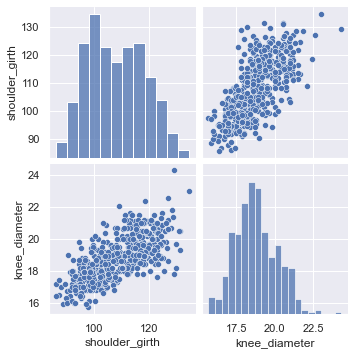

In [15]:
sns.pairplot(df[['shoulder_girth', 'knee_diameter']])
plt.show()

In [16]:
df[['shoulder_girth', 'knee_diameter']].corr()

,shoulder_girth,knee_diameter
shoulder_girth,1.00000,0.68361
knee_diameter,0.68361,1.00000


Condition 5: No Multicollinearity Condition

We see that there is a pretty strong linear relationship (R=0.68361) between the explanatory variables shoulder_girth and knee_diameter. Thus the multicollinearity condition is violated. Let's try deleting both variables (one at a time) and see which resulting model has a higher (ie. more explanatory power).

In [17]:
results = smf.ols('height ~ sex + age_group + knee_diameter', data=df).fit()
print('R^2 for the model without shoulder_girth:',results.rsquared)

R^2 for the model without shoulder_girth: 0.5410534042484594


In [18]:
results = smf.ols('height ~ sex + age_group + shoulder_girth', data=df).fit()
print('R^2 for the model without knee_diameter:',results.rsquared)

R^2 for the model without knee_diameter: 0.519061855116157


Thus, we can delete the shoulder_girth variable. This is because the R-square of the model without shoulder_girth is higher, and thus can explain more of the variability of height.

In [19]:
model4 = smf.ols('height ~ sex + age_group + knee_diameter', data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.01e-80
Time:                        16:44:05   Log-Likelihood:                -1594.8
No. Observations:                 487   AIC:                             3200.
Df Residuals:                     482   BIC:                             3220.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   124.4570      4.766     26.114      0.000     115.092     133.822
sex[T.Male]                   9.9728      0.695     14.357      0.000       8.608      11.338
age_group[T.40 and above]    -1.3920      0.899     -1.549      0.122      -3.158       0.374
age_group[T.under_30]         0.8017      0.709      1.130      0.259      -0.592       2.195
knee_diameter                 2.2166      0.260      8.530      0.000       1.706       2.727
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.686
Skew:                           0.063   Prob(JB):                        0.710
Kurtosis:                       2.867   Cond. No.                         310.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

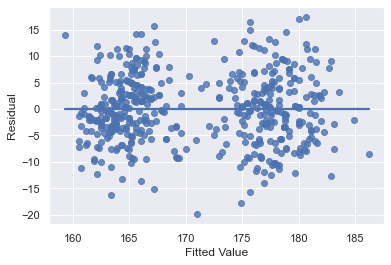

In [20]:
sns.regplot(x=model4.fittedvalues, y=model4.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 1: Linearity Condition

Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

Condition 2: Constant Variability of Residuals Condition

The y‑axis spread of points in the plot below doesn't seem to change as we move from left to right. Although having a slightly smaller spread in the middle part, there's not much data in that section, so we may say that this condition is may not be violated.

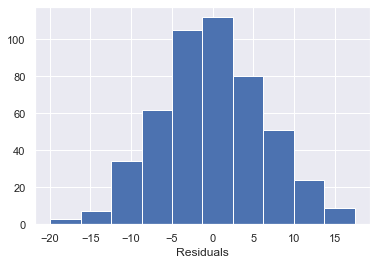

In [21]:
plt.hist(model4.resid)
plt.xlabel('Residuals')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is unimoal and symmetric and with a mean of 0, the assumption that the residuals are normally distributed is met.

Condition 4 Independence of Residuals Condition

At the very least, we verify that:
- the data is randomly sampled and
- the sample size n=487<10% of all healthy adults

Thus the condition for independence of residuals may not be violated in this particular way.

Condition 5: No Multicollinearity Condition

This new model only has one numerical explanatory variable, knee_diameter. So knee_diameter will not be collinear with another numerical variable. Thus this condition is met.

In [22]:
model4.rsquared

0.5410534042484594

c. iv. Around 54 percent of variability in my response variable is explained by this model in the dataset. I wouldn't say that the results is high, as it can definitelty be improved by consider more variables or adding more complexity to the model.

c. v. Make a prediction:

Let's predict the height of a 25 year old woman with a knee diameter of 15cm.

In [23]:
model4.predict(exog=dict(knee_diameter=15, sex='Female', age_group='under_30'))

0    158.507906
dtype: float64

c. vi. Which slopes in your model do we have sufficient evidence to suggest are non-zero in the population model? Explain your answer.

Set up the hypotheses.

$H_0: \beta_3 = 0$

$H_a: \beta_3 \neq 0$

($\beta_3$ is the population slope that corresponds to knee_diameter)

The summary output table tell us that this p‑value < 0.0001

Make a conclusion with this p‑value and a signficance level $\alpha = 0.05$.

Because p‑value < 0.0001 < $\alpha = 0.05$, we reject the null hypothesis. Thus we have sufficient evidence to suggest that the knee_diameter slope $\beta_3$ in the multiple linear regression population model is non‑zero.

d. Discuss how your linear regression analysis helps answer your research question.

From the linear regression model, we get that using the linear model construct by sex, age group, knee diameter variables could be a decent predictor to a person's height, and that shoulder girth may be a redundant explanatory variable. Also, we may consider other variables or a more complex model in order to increase the percent of variability of the model.

## 5. Logistic Regression

<h5><b>a. i.</b> Is there a linear relationship between the log-odds of sex (male:1, female:0) and height, weight, age, and chest_diameter in the sample? What about in the relevant population?</h5>

<h5><b>b.</b> Can we create a logistic regression predictor for sex using height, weight, age, and chest_diameter as explanatory variables?</h5>

In [24]:
df_lr = pd.read_csv('bdims.csv')
df_lr['sex'].value_counts()

Female    260
Male      227
Name: sex, dtype: int64

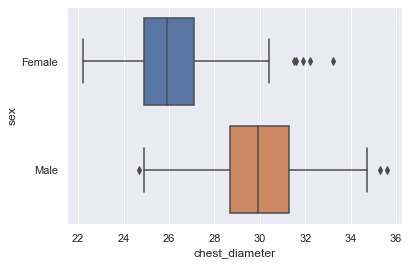

In [25]:
sns.boxplot(x='chest_diameter', y='sex', data=df_lr, order=['Female', 'Male'])
plt.show()

<h5><b>a. ii.</b> Create a 0/1 categorical variable from a categorical variable</h5>

In [26]:
df_lr['y']=df_lr['sex'].map({'Female':0,'Male':1})
df_lr.head()

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group,y
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,34.5,36.5,23.5,16.5,21,65.6,174.0,Male,under_30,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,36.5,37.5,24.5,17.0,23,71.8,175.3,Male,under_30,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,37.0,37.3,21.9,16.9,28,80.7,193.5,Male,under_30,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,37.0,34.8,23.0,16.6,23,72.6,186.5,Male,under_30,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30,1


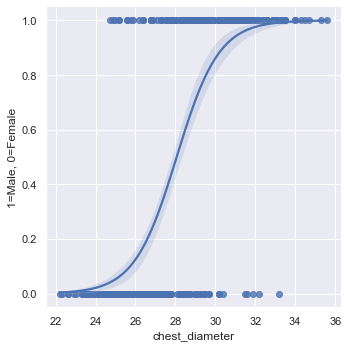

In [27]:
sns.lmplot(x="chest_diameter", y='y',data=df_lr, logistic=True)
plt.ylabel('1=Male, 0=Female')
plt.show()

In [28]:
logi = smf.logit(formula='y ~ chest_diameter', data=df_lr).fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.368012
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  487
Model:                          Logit   Df Residuals:                      485
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.4673
Time:                        16:44:07   Log-Likelihood:                -179.22
converged:                       True   LL-Null:                       -336.44
Covariance Type:            nonrobust   LLR p-value:                 2.350e-70
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -26.4734      2.260    -11.715      0.000     -30.903     -22.044
chest_diameter     0.9434      0.081     11.668      0.000       0.785       1.102
==================================================================================
"""

$\ln({\hat p \over 1-\hat p})$ = -26.4734 + 0.9434 * chest_diameter

In [29]:
logi = smf.logit(formula='y ~ chest_diameter + height + weight + age_group', data=df_lr).fit()
logi.summary()

Optimization terminated successfully.
         Current function value: 0.271063
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  487
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.6076
Time:                        16:44:07   Log-Likelihood:                -132.01
converged:                       True   LL-Null:                       -336.44
Covariance Type:            nonrobust   LLR p-value:                 3.629e-86
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -58.1983      5.998     -9.702      0.000     -69.955     -46.442
age_group[T.40 and above]     0.1797      0.491      0.366      0.715      -0.784       1.143
age_group[T.under_30]        -0.1533      0.378     -0.406      0.685      -0.894       0.587
chest_diameter                0.7406      0.114      6.524      0.000       0.518       0.963
height                        0.2214      0.031      7.185      0.000       0.161       0.282
weight                       -0.0065      0.024     -0.269      0.788      -0.054       0.041
=============================================================================================
"""

$\ln({\hat p \over 1-\hat p})$ = -58.1983 + 0.1797 * age_group[T.40 and above] - 0.1533 * age_group[T.under_30] + 0.7406 * chest_diameter + 0.2214 * height - 0.0065 * weight

<h3>Predicting log odds:</h3>
Log‑odds that a 20 year old person has 28cm of chest_diameter, 174cm of height, and 66kg of weight in this sample.

In [30]:
log_odds = -58.1983 - 0.1533 * 1 + 0.7406 * 28 + 0.2214 * 174 - 0.0065 * 66
odds = math.e ** log_odds
p = odds / (1 + odds)
print(f'log odds = {log_odds}, odds = {odds}, probability = {p}')

log odds = 0.4797999999999994, odds = 1.6157512196317871, probability = 0.6177006465696048


<h5><b>c. i.</b> Split training and testing dataset.</h5>

In [31]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_lr, test_size=0.20, random_state=116)

In [32]:
df_train

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group,y
448,37.4,29.4,31.7,16.5,25.9,12.2,10.8,19.4,14.3,95.1,...,36.2,36.7,23.7,15.9,29,63.0,168.9,Female,under_30,0
467,39.4,28.3,30.2,21.6,29.7,12.8,10.5,19.5,14.4,107.2,...,37.7,37.7,23.7,16.2,19,73.6,174.0,Female,under_30,0
137,40.3,25.2,29.2,18.7,28.5,13.2,10.2,18.9,14.3,108.3,...,34.6,37.4,23.0,16.4,33,66.4,165.1,Male,30-39,1
194,43.8,29.2,35.6,19.9,28.3,14.8,12.8,20.7,14.3,112.2,...,37.5,41.8,26.2,17.8,27,77.7,175.9,Male,under_30,1
30,39.4,28.3,30.6,20.2,28.7,15.0,11.5,18.4,14.4,118.7,...,34.2,38.1,21.1,16.9,23,75.6,169.5,Male,under_30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,39.9,28.3,32.0,18.3,31.4,13.5,11.4,18.9,14.4,115.2,...,35.8,36.3,21.8,16.7,21,74.8,177.8,Male,under_30,1
49,41.2,26.6,30.6,19.5,28.0,13.1,10.4,19.0,13.8,111.2,...,34.8,32.6,21.0,16.1,36,63.2,175.5,Male,30-39,1
380,35.1,28.3,29.7,18.2,27.3,13.0,9.3,17.7,13.8,96.6,...,32.4,32.9,20.3,14.6,30,50.0,162.6,Female,30-39,0
443,35.6,28.3,28.0,14.4,23.7,11.7,9.6,16.4,13.0,95.4,...,32.0,32.6,21.0,14.0,27,52.7,167.6,Female,under_30,0


In [33]:
df_train.shape[0]/df_lr.shape[0]

0.7987679671457906

In [34]:
df_test

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group,y
126,40.1,28.7,32.2,18.0,29.4,15.2,11.8,20.7,15.4,113.0,...,36.9,36.4,22.9,17.0,32,72.0,177.8,Male,30-39,1
260,36.6,28.2,32.0,14.3,26.0,11.8,9.9,18.0,12.7,95.0,...,33.0,34.8,20.5,14.4,25,54.4,160.0,Female,under_30,0
420,37.4,32.0,34.7,19.7,25.9,13.0,10.0,18.4,13.4,105.2,...,36.3,34.3,20.5,14.8,52,63.2,164.5,Female,40 and above,0
162,40.1,26.4,32.0,21.4,32.6,14.8,12.0,20.0,15.2,121.6,...,37.0,37.6,23.0,17.5,22,84.1,185.4,Male,under_30,1
288,39.4,29.2,34.7,18.0,28.3,13.4,10.5,19.8,13.1,104.8,...,38.1,37.7,21.7,15.9,19,74.3,160.0,Female,under_30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,38.9,27.1,31.7,21.6,29.7,15.0,12.2,20.5,15.2,119.0,...,39.0,38.1,23.0,17.0,43,87.3,188.0,Male,40 and above,1
141,45.4,30.8,35.6,20.9,29.7,15.2,10.8,18.6,15.0,122.6,...,40.4,37.8,24.9,17.9,34,84.1,190.5,Male,30-39,1
414,38.0,28.3,31.1,17.7,26.1,12.2,10.2,17.3,13.0,101.7,...,32.7,34.3,21.7,15.4,31,58.6,163.8,Female,30-39,0
316,36.5,27.0,31.6,16.6,24.4,11.9,9.7,18.0,12.5,94.9,...,35.4,34.8,21.0,15.0,23,55.9,170.0,Female,under_30,0


In [35]:
df_test.shape[0]/df_lr.shape[0]

0.20123203285420946

<h5> <b>c. ii.</b> Find a parsimonious logistic regression model</h5>

In [36]:
backward1 = smf.ols('y ~ chest_diameter + height + weight + age_group', data=df_train).fit()
backward1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.40e-71
Time:                        16:44:08   Log-Likelihood:                -109.55
No. Observations:                 389   AIC:                             231.1
Df Residuals:                     383   BIC:                             254.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -5.5620      0.400    -13.917      0.000      -6.348      -4.776
age_group[T.40 and above]     0.0320      0.050      0.644      0.520      -0.066       0.130
age_group[T.under_30]         0.0130      0.040      0.325      0.746      -0.066       0.092
chest_diameter                0.0793      0.011      7.173      0.000       0.058       0.101
height                        0.0223      0.003      8.569      0.000       0.017       0.027
weight                       -0.0002      0.003     -0.070      0.944      -0.005       0.005
==============================================================================
Omnibus:                        1.033   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.136
Skew:                           0.107   Prob(JB):                        0.567
Kurtosis:                       2.844   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
backward2 = smf.ols('y ~ height + weight + age_group', data=df_train).fit()
backward2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 01 May 2023   Prob (F-statistic):           3.30e-62
Time:                        16:44:08   Log-Likelihood:                -134.07
No. Observations:                 389   AIC:                             278.1
Df Residuals:                     384   BIC:                             298.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -4.3332      0.384    -11.283      0.000      -5.088      -3.578
age_group[T.40 and above]     0.0078      0.053      0.147      0.883      -0.096       0.111
age_group[T.under_30]        -0.0181      0.042     -0.427      0.669      -0.102       0.065
height                        0.0230      0.003      8.315      0.000       0.018       0.028
weight                        0.0127      0.002      6.408      0.000       0.009       0.017
==============================================================================
Omnibus:                        2.387   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                2.171
Skew:                           0.098   Prob(JB):                        0.338
Kurtosis:                       2.691   Cond. No.                     4.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
backward3 = smf.ols('y ~ chest_diameter + weight + age_group', data=df_train).fit()
backward3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     99.68
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.11e-58
Time:                        16:44:08   Log-Likelihood:                -143.67
No. Observations:                 389   AIC:                             297.3
Df Residuals:                     384   BIC:                             317.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6303      0.225    -11.682      0.000      -3.073      -2.188
age_group[T.40 and above]    -0.0259      0.054     -0.483      0.629      -0.131       0.080
age_group[T.under_30]         0.0369      0.044      0.847      0.398      -0.049       0.123
chest_diameter                0.0829      0.012      6.879      0.000       0.059       0.107
weight                        0.0112      0.002      4.607      0.000       0.006       0.016
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.219
Skew:                          -0.053   Prob(JB):                        0.896
Kurtosis:                       3.047   Cond. No.                         961.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
backward4 = smf.ols('y ~ chest_diameter + height + age_group', data=df_train).fit()
backward4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.13e-72
Time:                        16:44:08   Log-Likelihood:                -109.56
No. Observations:                 389   AIC:                             229.1
Df Residuals:                     384   BIC:                             248.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -5.5433      0.299    -18.551      0.000      -6.131      -4.956
age_group[T.40 and above]     0.0314      0.049      0.642      0.521      -0.065       0.127
age_group[T.under_30]         0.0130      0.040      0.326      0.745      -0.066       0.092
chest_diameter                0.0788      0.008      9.907      0.000       0.063       0.094
height                        0.0222      0.002      9.945      0.000       0.018       0.027
==============================================================================
Omnibus:                        1.024   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.127
Skew:                           0.107   Prob(JB):                        0.569
Kurtosis:                       2.845   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
backward5 = smf.ols('y ~ chest_diameter + weight + height', data=df_train).fit()
backward5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     183.1
Date:                Mon, 01 May 2023   Prob (F-statistic):           9.40e-74
Time:                        16:44:08   Log-Likelihood:                -109.76
No. Observations:                 389   AIC:                             227.5
Df Residuals:                     385   BIC:                             243.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.5148      0.392    -14.068      0.000      -6.285      -4.744
chest_diameter     0.0789      0.011      7.188      0.000       0.057       0.100
weight             0.0001      0.003      0.042      0.967      -0.005       0.005
height             0.0221      0.003      8.699      0.000       0.017       0.027
==============================================================================
Omnibus:                        0.930   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                1.038
Skew:                           0.097   Prob(JB):                        0.595
Kurtosis:                       2.837   Cond. No.                     4.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
backward6 = smf.ols('y ~  chest_diameter + height', data=df_train).fit()
backward6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     275.3
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.01e-75
Time:                        16:44:08   Log-Likelihood:                -109.77
No. Observations:                 389   AIC:                             225.5
Df Residuals:                     386   BIC:                             237.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.5255      0.296    -18.657      0.000      -6.108      -4.943
chest_diameter     0.0792      0.008     10.278      0.000       0.064       0.094
height             0.0221      0.002     10.026      0.000       0.018       0.026
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                1.042
Skew:                           0.097   Prob(JB):                        0.594
Kurtosis:                       2.836   Cond. No.                     3.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
backward7 = smf.ols('y ~ chest_diameter + weight', data=df_train).fit()
backward7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.52e-60
Time:                        16:44:08   Log-Likelihood:                -144.67
No. Observations:                 389   AIC:                             295.3
Df Residuals:                     386   BIC:                             307.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5752      0.217    -11.864      0.000      -3.002      -2.148
chest_diameter     0.0821      0.012      6.851      0.000       0.059       0.106
weight             0.0110      0.002      4.539      0.000       0.006       0.016
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.210
Skew:                          -0.038   Prob(JB):                        0.900
Kurtosis:                       3.085   Cond. No.                         925.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
backward8 = smf.ols('y ~ weight + height', data=df_train).fit()
backward8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     219.9
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.80e-64
Time:                        16:44:08   Log-Likelihood:                -134.26
No. Observations:                 389   AIC:                             274.5
Df Residuals:                     386   BIC:                             286.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3087      0.377    -11.435      0.000      -5.050      -3.568
weight         0.0131      0.002      6.890      0.000       0.009       0.017
height         0.0227      0.003      8.411      0.000       0.017       0.028
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.102
Skew:                           0.091   Prob(JB):                        0.350
Kurtosis:                       2.689   Cond. No.                     4.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
backward9 = smf.ols('y ~ chest_diameter', data=df_train).fit()
backward9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     358.0
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.28e-57
Time:                        16:44:08   Log-Likelihood:                -154.78
No. Observations:                 389   AIC:                             313.6
Df Residuals:                     387   BIC:                             321.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0891      0.190    -16.274      0.000      -3.462      -2.716
chest_diameter     0.1275      0.007     18.922      0.000       0.114       0.141
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.315
Skew:                          -0.017   Prob(JB):                        0.854
Kurtosis:                       2.865   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
backward10 = smf.ols('y ~ height', data=df_train).fit()
backward10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     350.3
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.03e-56
Time:                        16:44:08   Log-Likelihood:                -156.82
No. Observations:                 389   AIC:                             317.6
Df Residuals:                     387   BIC:                             325.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7370      0.333    -17.228      0.000      -6.392      -5.082
height         0.0364      0.002     18.715      0.000       0.033       0.040
==============================================================================
Omnibus:                        9.456   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                5.559
Skew:                           0.095   Prob(JB):                       0.0621
Kurtosis:                       2.446   Cond. No.                     3.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Use variables chest_diameter and height, because it has the smallest AIC and BIC values.

<h5> <b>c. iii.</b> Fit the training dataset && <b>c. iv.</b> Summary output of final logistic regression model</h5>

In [46]:
result = smf.logit('y ~  chest_diameter + height', data=df_train).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.273211
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  389
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            2
Date:                Mon, 01 May 2023   Pseudo R-squ.:                  0.6056
Time:                        16:44:08   Log-Likelihood:                -106.28
converged:                       True   LL-Null:                       -269.48
Covariance Type:            nonrobust   LLR p-value:                 1.328e-71
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -59.3082      6.284     -9.439      0.000     -71.624     -46.993
chest_diameter     0.7283      0.099      7.393      0.000       0.535       0.921
height             0.2269      0.032      7.171      0.000       0.165       0.289
==================================================================================
"""

<h5><b>c. v.</b> Write out the logistic regression equation for your final model</h5>

$\ln({\hat p \over 1-\hat p})$ = -59.3082 + 0.7283 * chest_diameter + 0.2269 * height

<h5><b>c. vi.</b> Which slopes in your final model do we have sufficient evidence to
suggest are non-zero in the population model?</h5>

$H0$ : $\hat{\beta_{chest_diameter}}$ = 0 <br>
$Ha$ : $\hat{\beta_{chest_diameter}}$ $\neq$ 0 <br>

$\beta_{chest_diameter}$ is the slope of chest_diameter in the model. <br>

Since p-value is 0.000 which is less than the significant value $\alpha$ = 0.05, we reject the null hypothesis. Thus we have sufficient evidence that the slope of chest diameter is non-zero in the population model.

$H0$ : $\hat{\beta_{height}}$ = 0 <br>
$Ha$ : $\hat{\beta_{height}}$ $\neq$ 0 <br>

$\beta_{height}$ is the slope of height in the model. <br>

Since p-value is 0.000 which is less than the significant value $\alpha$ = 0.05, we reject the null hypothesis. Thus we have sufficient evidence that the slope of height is non-zero in the population model.

<h5><b>c. vii.</b> Use your logistic regression model to calculate the ROC and AUC of your test dataset</h5>

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

def calculate_roc_auc(model, df=df_test):
    fpr, tpr, threshold = roc_curve(y_true=df['y'], y_score=model.predict(exog=dict(df)))
    auc = roc_auc_score(y_true=df['y'], y_score=model.predict(exog=dict(df)))
    return fpr, tpr, threshold, auc
fpr, tpr, threshold, auc = calculate_roc_auc(result)
auc

0.9460526315789474

In [48]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

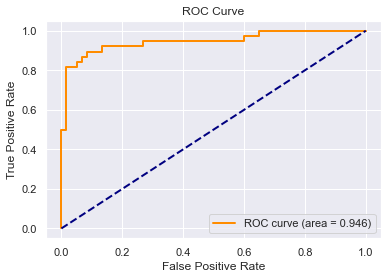

In [49]:
plot_roc(fpr, tpr, auc)

<h5><b>c. viii.</b> Use your ROC to pick a good predictive probability threshold. Explain
why this is a good predictive probability threshold, given your research
goals</h5>

In [50]:
phat = result.predict(exog=df_test)
df_test['phat'] = phat

In [51]:
from sklearn.metrics import confusion_matrix
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh], 'tpr':[tpr], 'fpr':[fpr]})

In [52]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.733333
   threshold  tpr   fpr
0       0.02  1.0  0.65
   threshold       tpr  fpr
0       0.03  0.947368  0.6
   threshold       tpr       fpr
0       0.04  0.947368  0.533333
   threshold       tpr       fpr
0       0.05  0.947368  0.466667
   threshold       tpr       fpr
0       0.06  0.947368  0.433333
   threshold       tpr       fpr
0       0.07  0.947368  0.383333
   threshold       tpr  fpr
0       0.08  0.947368  0.3
   threshold       tpr       fpr
0       0.09  0.947368  0.266667
   threshold       tpr       fpr
0        0.1  0.947368  0.266667
   threshold       tpr       fpr
0       0.11  0.921053  0.266667
   threshold       tpr   fpr
0       0.12  0.921053  0.25
   threshold       tpr       fpr
0       0.13  0.921053  0.216667
   threshold       tpr       fpr
0       0.14  0.921053  0.216667
   threshold       tpr       fpr
0       0.15  0.921053  0.216667
   threshold       t

Option 1: $p_0$ = 0.63 (FPR = 0.016667, TPR = 0.815789)<br>
Option 2: $p_0$ = 0.36 (FPR = 0.083333, TPR = 0.894737)

I think Option 2 is a better predictive probability, as it is closer to the ideal fpr and tpr rate (0, 1), and the model we build value FPR and TPR equivalently, so the goal is to find a $p_0$ values that minimizes both rates.

<h5><b>c. ix.</b> False positive rate and the true positive rate of classification of the test data</h5>

In [53]:
print(tpr_fpr_thresh(df_test['y'], df_test['phat'], 0.36))

   threshold       tpr       fpr
0       0.36  0.894737  0.083333


<h5><b>d. </b>How the logistic regression analysis helps answer research question</h5>

The logistic model we trained turned out to be a pretty accurate predictor for sex using the four explanatory varaibles we pick, suggesting that one can predict sex using height, weight, age, and chest diameter to some extent.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

Summarization: After conducting research on these questions, we found that waist girth is a useful indicator of a person's weight and that it varies between males and females. We also identified a correlation between sex and chest diameter and height. Furthermore, using a person's sex, age, and knee diameter, we were able to predict their height.

Future work: For future work, we can see if there's a better model other than the linear and logistic regression model we use currently to answer the research quesitons, or we can try to add more variables to the dataset and find other interesting relations between sex, and other body measurements. And based on the analyses conducted, we could examine the relationship between weight and height, including all other parameters, which could be pursued in the future.